<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [3]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



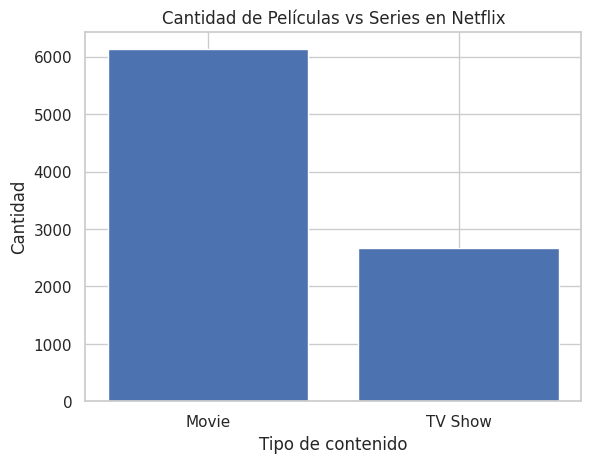

In [4]:
#1.Distribución de tipos de contenido
#Realiza un gráfico de barras mostrando la cantidad de películas vs series (type).
y = df["type"].value_counts()
x=y.index
y=y.values

plt.bar(x,y)
plt.title('Cantidad de Películas vs Series en Netflix')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.show()

#Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?
#Respuesta: Observando el gráfico de barra, podemos indicar que Netflix históricamente presenta más contenido de películas que de Series.



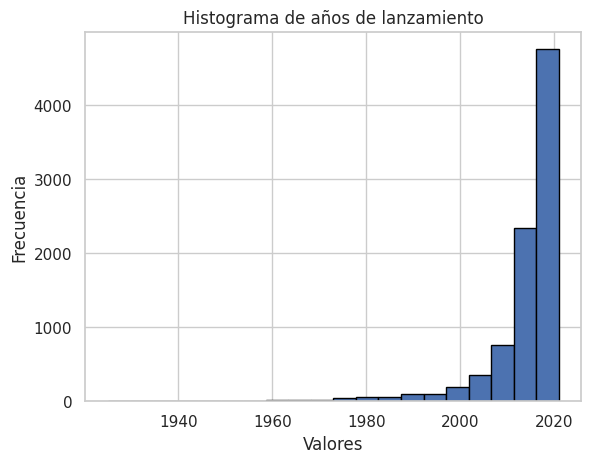

In [5]:
#2.Histograma de años de lanzamiento
#Muestra cómo se distribuyen los títulos según su release_year.

data=df['release_year']
plt.hist(data, bins=20,edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de años de lanzamiento')
plt.show()

#Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?
#Respuesta: Hay más contenido reciente que antiguo, donde la cantidad de contenido ha ido aumentando significativamente.

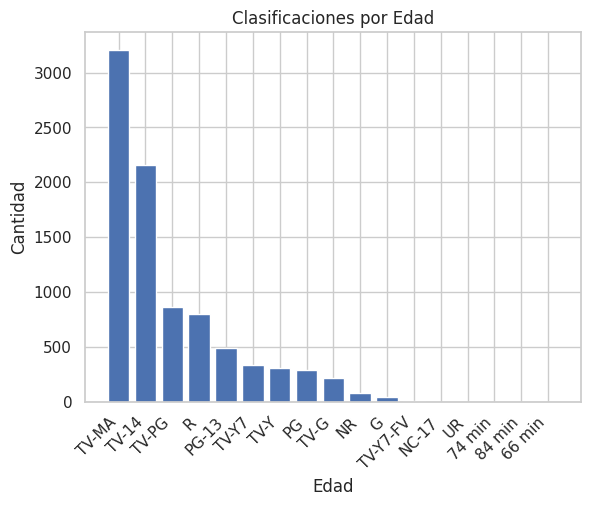

In [6]:
#3.Proporción de clasificaciones por edad (rating)
#Haz un gráfico circular o de barras.

y = df["rating"].value_counts()
x=y.index
y=y.values

plt.bar(x,y)
plt.title('Clasificaciones por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha="right")
plt.show()

#Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?
#La clasificación más común es TV-MA. Luego, la mayoría del contenido está enfocado en contenido para adultos/adolecentes.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


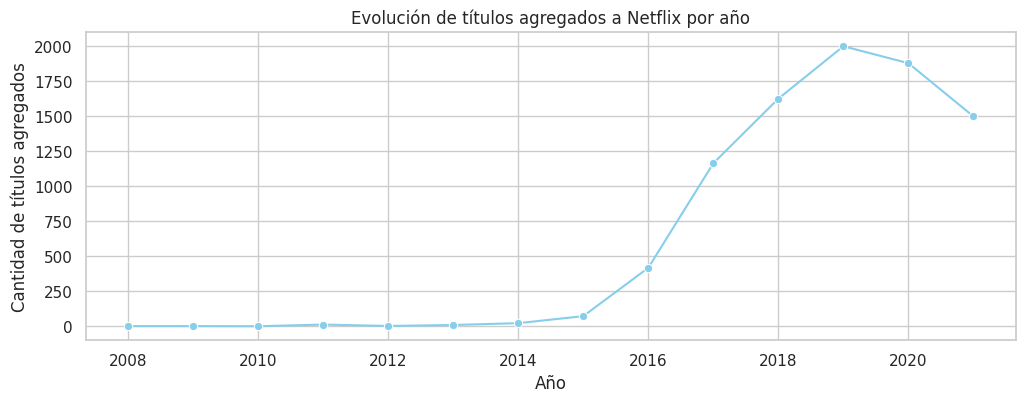

In [7]:
#4.Número de títulos agregados por año

#Usa date_added (convertido a fecha) y grafica una serie temporal.

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

conteo = df['year_added'].value_counts().sort_index()
conteo = conteo.reset_index()
conteo.columns = ['year_added', 'quantity']

# Graficar
plt.figure(figsize=(12, 4))
sns.lineplot(
    data=conteo,
    x='year_added',
    y='quantity',
    color='skyblue',
    marker='o'
)

plt.xlabel('Año')
plt.ylabel('Cantidad de títulos agregados')
plt.title('Evolución de títulos agregados a Netflix por año')
plt.show()

#Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?
#desde el 2008 hasta el 2019 el catálogo ha crecido, no obstante, desde dicho año el catálogo ha ido disminuyendo hasta la fecha.

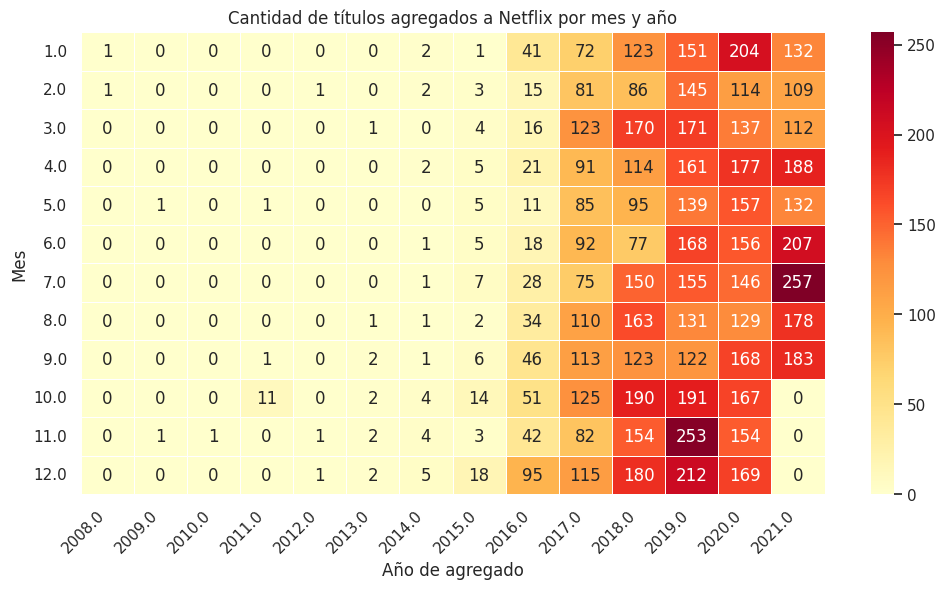

In [8]:
#Heatmap de lanzamientos por año y mes

#Construye un mapa de calor con year_added y month_added.
df['month_added'] = df['date_added'].dt.month
heatmap_data = df.pivot_table(index='month_added', columns='year_added', values='show_id', aggfunc='count', fill_value=0)
plt.figure(figsize=(12,6))

sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d')

plt.title('Cantidad de títulos agregados a Netflix por mes y año')
plt.xlabel('Año de agregado')
plt.ylabel('Mes')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.show()

#Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?
#observando el gráfico, la distribución de cantidad de títulos agregados por año y mes es simétrico para casi todos los meses, a excepción
#del año 2021 que donde los meses octubre, noviembre y diciembre no presentaron titulos agregados.


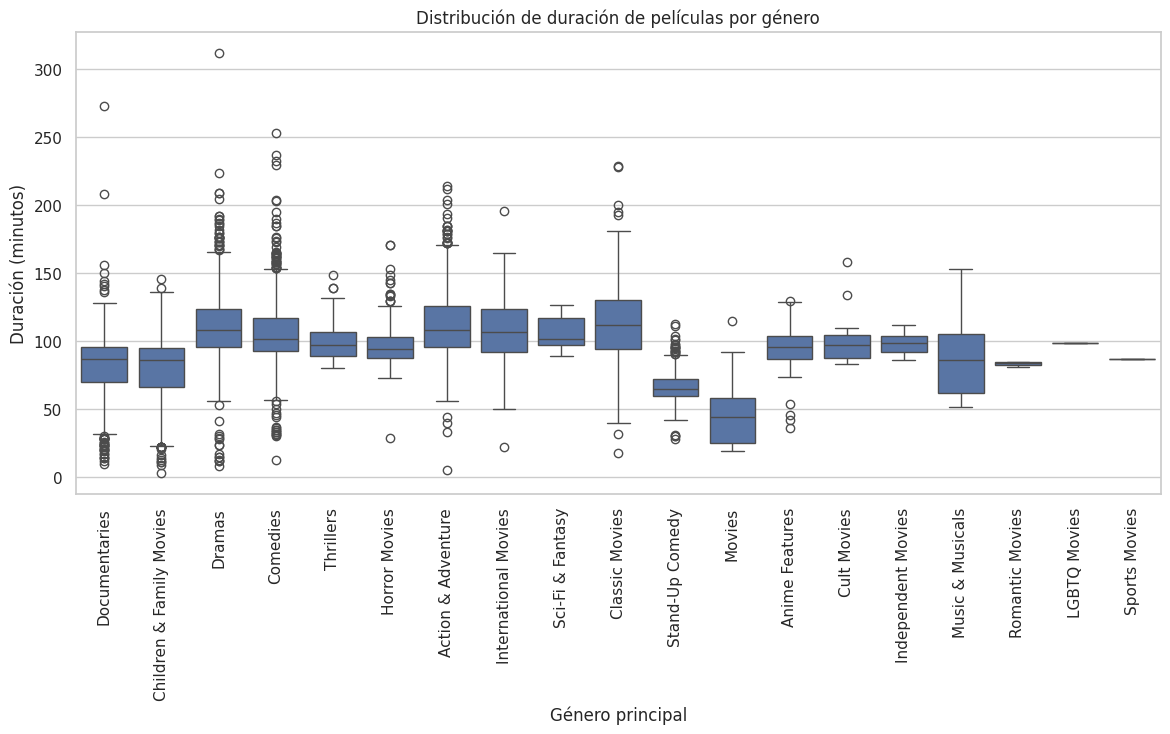

In [9]:
#6.Duración de películas por género

#Extrae la duración en minutos y crea un boxplot agrupado por género principal.

peliculas = df[df["type"] == "Movie"].copy()
peliculas["duration_min"] = peliculas["duration"].str.replace(" min","").astype(float)
peliculas["genre"] = peliculas["listed_in"].str.split(",").str[0]

plt.figure(figsize=(14,6))
sns.boxplot(
    data=peliculas,
    x="genre",
    y="duration_min"
)

plt.xticks(rotation=90)  # rotamos etiquetas para que no se encimen
plt.xlabel("Género principal")
plt.ylabel("Duración (minutos)")
plt.title("Distribución de duración de películas por género")
plt.show()

#Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?





## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-842294293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette='Set3')


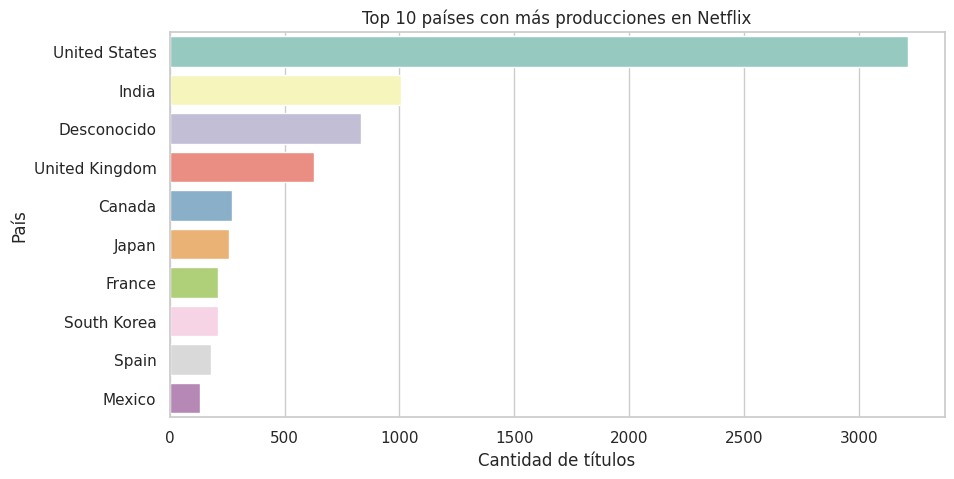

In [10]:
#7.Top 10 países con más producciones
df['country'] = df['country'].fillna('Desconocido')
df['main_country'] = df['country'].str.split(',').str[0].str.strip()
top_paises = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_paises.values, y=top_paises.index, palette='Set3')
plt.title('Top 10 países con más producciones en Netflix')
plt.xlabel('Cantidad de títulos')
plt.ylabel('País')
plt.show()

#Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?
#United States, seguido de India y United Kingdom (esto sin considerar a los paises que figuran como Desconocido).
#Luego, la distribución es la esperada para el primer puesto.


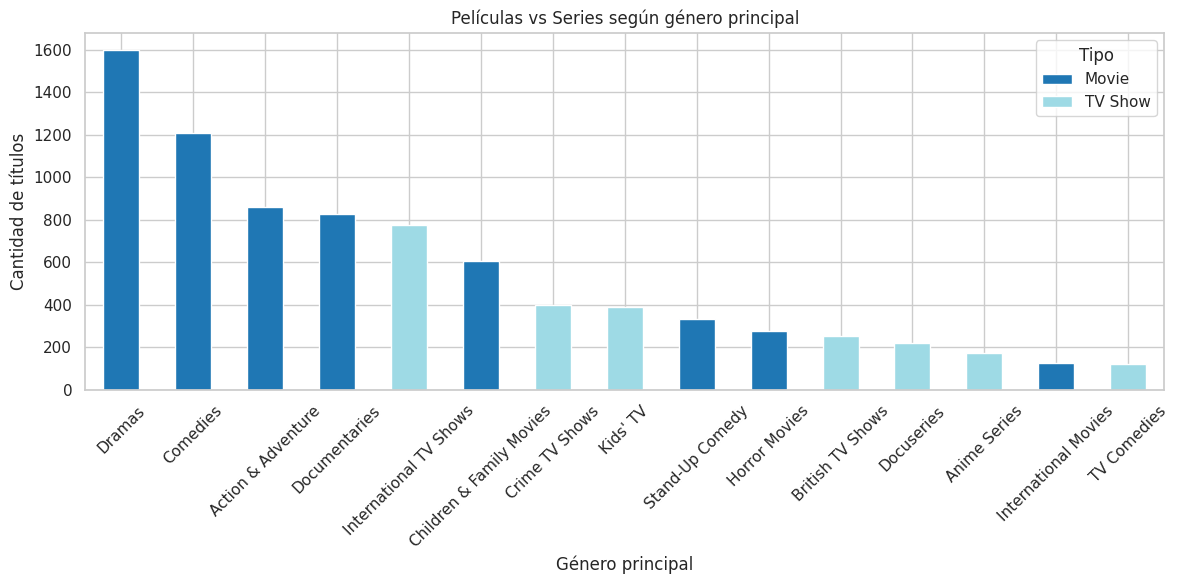

In [12]:
#8,Películas vs Series según género
#Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando Movie y TV Show.

df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()
df = df.dropna(subset=['main_genre', 'type']) # Eliminar registros sin género o tipo
conteo_generos = df.groupby(['main_genre', 'type']).size().unstack(fill_value=0)
conteo_generos['total'] = conteo_generos.sum(axis=1)
conteo_generos = conteo_generos.sort_values(by='total', ascending=False).head(15) # dejar sólo los primeros 15.
conteo_generos = conteo_generos.drop(columns='total')
conteo_generos.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Películas vs Series según género principal')
plt.xlabel('Género principal')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

#Pregunta guía: ¿Existen géneros más asociados a películas o a series?
#observando el gráfico, se puede observar que existen más generos asociados a las peliculas que a las series.

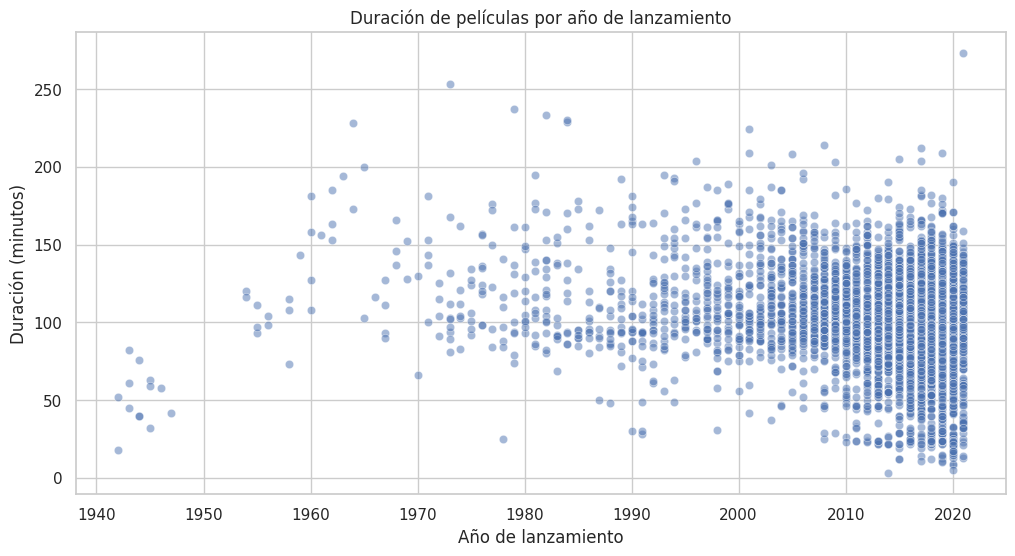

In [13]:
#9.Relación entre duración y año de lanzamiento
#Haz un gráfico de dispersión (scatterplot) con release_year en el eje X y duration (en minutos) en el eje Y.

df_movies = df[df['type'] == 'Movie'].copy()
df_movies = df_movies[df_movies['duration'].str.contains('min', na=False)]
df_movies['duration_min'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)
df_movies = df_movies[df_movies['duration_min'] < 300]
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_movies, x='release_year', y='duration_min', alpha=0.5)
plt.title('Duración de películas por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración (minutos)')
plt.grid(True)
plt.show()

#Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?
#observando el gráfico, ha existido una mayor variedad en la duración de peliculas através de los años. No obstante, se pueden observar que existen
#valores atípicos tanto en duraciones mayores a 250 min como también un aumento en la cantidad de lanzamientos con menos de 50 minutos de duración.


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

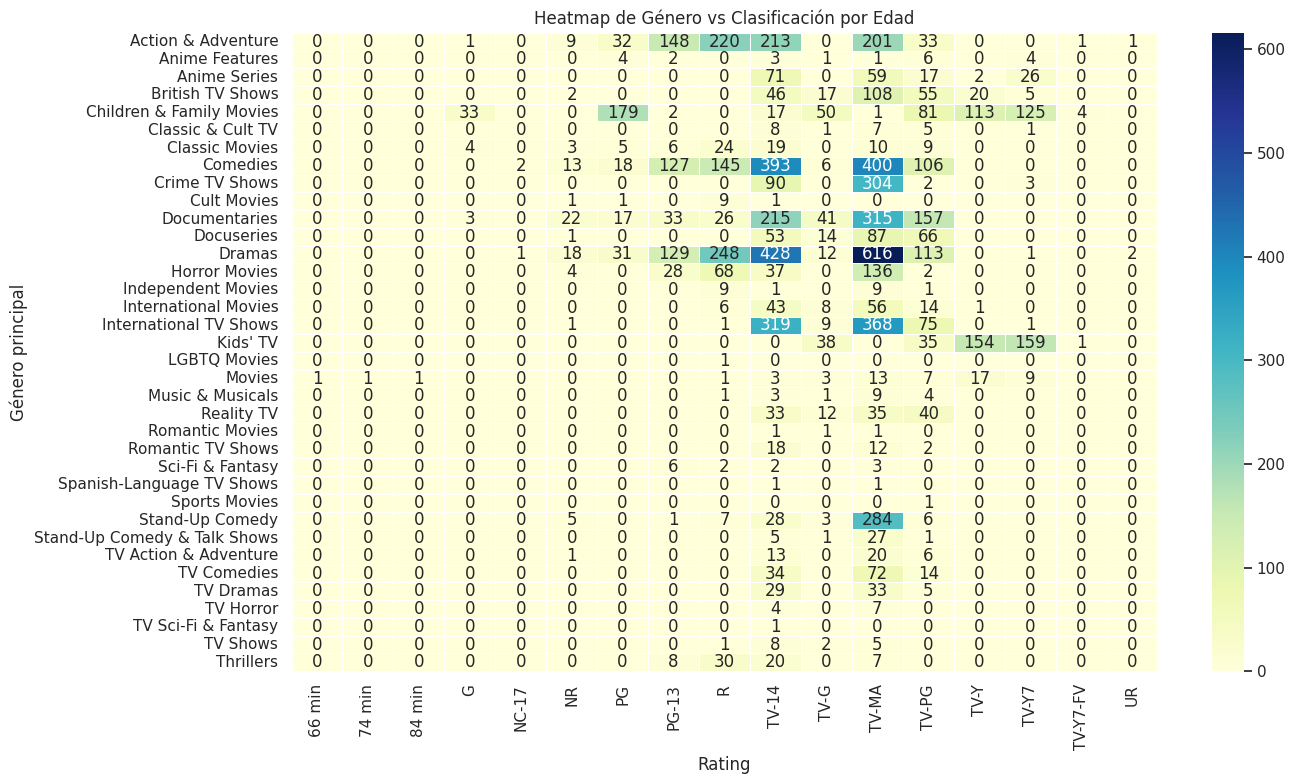

In [14]:
df = df.dropna(subset=['listed_in', 'rating'])
df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()
conteo = df.groupby(['main_genre', 'rating']).size().reset_index(name='conteo')
tabla = conteo.pivot(index='main_genre', columns='rating', values='conteo').fillna(0)
plt.figure(figsize=(14,8))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)

plt.title('Heatmap de Género vs Clasificación por Edad')
plt.xlabel('Rating')
plt.ylabel('Género principal')
plt.tight_layout()
plt.show()

#Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?
#Observando el gráfico, se puede observar que los géneros más dirigidos a adultos son: Dramas, Documentaries, Crime TV Shows, International TV Shows, Reality TV, Romantic TV Shows, Stand-Up Comedy
#Mientras que para los géneros más familiares o infantiles son: Children & Family Movies, Kids' TV, Classic & Cult TV (en algunos casos)


# FIXME